In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mplsoccer import Pitch, add_image,FontManager
from PIL import Image
import matplotlib.image as mpimg
from pywaffle import Waffle
from highlight_text import fig_text
from soccerplots.radar_chart import Radar

In [2]:
path = "/work/assets/fbref/leagueStats/serie/2122/defense.csv"
comp = "liga"
seasons = ["2122"]
df2021 = []
df2122 = []
for season in seasons:
    df_def = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/defense.csv")
    df_gs = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/gca.csv")
    df_mis = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/misc.csv")
    df_pass = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/passing.csv")
    df_ptype = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/passing_types.csv")
    df_pos = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/possession.csv")
    df_shot = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/shooting.csv")
    df_stan = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/standard.csv")
    df = pd.concat([df_def, 
                    df_gs, df_mis, 
                    df_pass, 
                    df_ptype, df_pos, 
                    df_shot, 
                    df_stan], axis=1)
    df = df.loc[:,~df.columns.duplicated()]
#     df = df.dropna()
    
    if season == seasons[0]:
        df2021 = df
    elif season == seasons[1]:
        df2122 = df


In [3]:
comps = ["liga","serie"]
season = "2122"
df2021 = []
df2122 = []
for comp in comps:
    df_def = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/defense.csv")
    df_gs = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/gca.csv")
    df_mis = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/misc.csv")
    df_pass = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/passing.csv")
    df_ptype = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/passing_types.csv")
    df_pos = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/possession.csv")
    df_shot = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/shooting.csv")
    df_stan = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/standard.csv")
    df = pd.concat([df_def, 
                    df_gs, df_mis, 
                    df_pass, 
                    df_ptype, df_pos, 
                    df_shot, 
                    df_stan], axis=1)
    df = df.loc[:,~df.columns.duplicated()]
#     df = df.dropna()
    if comp == comps[0]:
        df2021 = df
    elif comp == comps[1]:
        df2122 = df
#     if season == seasons[0]:
#         df2021 = df
#     elif season == seasons[1]:
#         df2122 = df


In [4]:
df_mis.columns

Index(['Unnamed: 0', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s',
       'CrdY_Performance', 'CrdR_Performance', '2CrdY_Performance',
       'Fls_Performance', 'Fld_Performance', 'Off_Performance', 'Crs', 'Int',
       'TklW', 'PKwon_Performance', 'PKcon_Performance', 'OG_Performance',
       'Recov_Performance', 'Won_Aerial Duels', 'Lost_Aerial Duels',
       'Won%_Aerial Duels'],
      dtype='object')

In [5]:
def setup(df):

    df.loc[:, ['Tkl_Tackles',"TklW_Tackles",'Def 3rd_Tackles', 'Mid 3rd_Tackles','Att 3rd_Tackles',
                   'Int','Blocks_Blocks','Fls_Performance',
                   'Def 3rd_Pressures','Mid 3rd_Pressures', 'Att 3rd_Pressures','Sw_Pass Types']] = \
        df.loc[:, ['Tkl_Tackles',"TklW_Tackles",'Def 3rd_Tackles', 'Mid 3rd_Tackles','Att 3rd_Tackles',
                   'Int','Blocks_Blocks','Fls_Performance',
                   'Def 3rd_Pressures','Mid 3rd_Pressures', 'Att 3rd_Pressures','Sw_Pass Types']].apply(lambda x:x/df["90s"])
    df["Past_Vs Dribbles"] = 100 - df["Past_Vs Dribbles"]
    df["Tkl_Win %"] = (df['TklW_Tackles'] / df['Tkl_Tackles'])*100
    df['PKcon_Performance'] = 10 - df['PKcon_Performance'] 
#     df = df[(df["Player"].str.contains("Lenglet"))]
    df = df[df["Pos"].str.contains("DF")]
#     df = df.drop(columns=["90s","Player"])
    return df

In [6]:
df1 = setup(df2021)
df2 = setup(df2122)
dfAll = pd.concat([df2021,df2122])

In [7]:
df2021[['Tkl_Win %','PKcon_Performance','Fls_Performance',"Past_Vs Dribbles"]].max()

Tkl_Win %            100.0
PKcon_Performance     10.0
Fls_Performance        inf
Past_Vs Dribbles     100.0
dtype: float64

In [8]:
dfAll[dfAll["Squad"].str.contains("Milan")]

,Unnamed: 0,Player,Nation,Pos,Squad,Age,Born,90s,Tkl_Tackles,TklW_Tackles,...,G-PK_Per 90 Minutes,G+A-PK_Per 90 Minutes,xA_Expected,npxG+xA_Expected,xG_Per 90 Minutes,xA_Per 90 Minutes,xG+xA_Per 90 Minutes,npxG_Per 90 Minutes,npxG+xA_Per 90 Minutes,Tkl_Win %
33,33,Tiemoué Bakayoko,fr FRA,MF,Milan,26.0,1994.0,5.6,3.392857,2.321429,...,0.00,0.00,0.5,0.8,0.05,0.09,0.15,0.05,0.15,68.421053
36,36,Fodé Ballo-Touré,sn SEN,DF,Milan,24.0,1997.0,5.0,3.800000,2.400000,...,0.00,0.00,0.2,0.7,0.11,0.04,0.15,0.11,0.15,63.157895
52,52,Ismaël Bennacer,dz ALG,MF,Milan,23.0,1997.0,16.9,3.076923,2.248521,...,0.12,0.18,2.0,2.8,0.05,0.12,0.16,0.05,0.16,73.076923
83,83,Davide Calabria,it ITA,DF,Milan,24.0,1996.0,23.5,3.234043,1.872340,...,0.08,0.17,1.4,4.6,0.14,0.06,0.20,0.14,0.20,57.894737
95,95,Samu Castillejo,es ESP,"FW,MF",Milan,26.0,1995.0,1.4,1.428571,0.714286,...,0.00,0.00,0.2,0.3,0.08,0.13,0.21,0.08,0.21,50.000000
149,149,Brahim Díaz,es ESP,MF,Milan,21.0,1999.0,20.6,1.650485,1.310680,...,0.15,0.29,2.5,7.2,0.23,0.12,0.35,0.23,0.35,79.411765
182,182,Alessandro Florenzi,it ITA,"DF,FW",Milan,30.0,1991.0,12.8,2.187500,1.250000,...,0.16,0.16,1.2,2.0,0.06,0.10,0.15,0.06,0.15,57.142857
189,189,Matteo Gabbia,it ITA,DF,Milan,21.0,1999.0,6.0,0.833333,0.666667,...,0.00,0.00,0.1,0.2,0.02,0.01,0.03,0.02,0.03,80.000000
201,201,Olivier Giroud,fr FRA,FW,Milan,34.0,1986.0,21.0,0.809524,0.523810,...,0.43,0.57,2.0,10.8,0.49,0.10,0.59,0.42,0.51,64.705882
220,220,Theo Hernández,fr FRA,DF,Milan,23.0,1997.0,30.1,2.059801,1.428571,...,0.13,0.30,6.4,9.3,0.13,0.21,0.34,0.10,0.31,69.354839


In [9]:
params = ["Player",'Tkl_Tackles',"Tkl_Win %",'Def 3rd_Tackles', 'Mid 3rd_Tackles','Att 3rd_Tackles','Past_Vs Dribbles',
          'Int','Blocks_Blocks','Sw_Pass Types','PKcon_Performance','Fls_Performance',
          'Def 3rd_Pressures','Mid 3rd_Pressures', 'Att 3rd_Pressures','%_Pressures','Won%_Aerial Duels']

dfAll = dfAll[params]
dfAll.fillna(0,inplace=True)
print("params :",len(params))

params : 17


In [10]:
describer = dfAll.describe()

range_max = describer.loc['75%',:]*1.5
range_min = describer.loc['min',:]
range_mean = describer.loc['mean',:]

ranges = []
for i in range(len(range_max)):
    _max = range_max[i]
    _min = range_min[i]
    ranges.append((_min, _max))
    
ranges[1] = (0, 100)
ranges[5] = (0, 100)
ranges[9] = (0, 10)
ranges[-2] = (0, 100)
ranges[-1] = (0, 100)
    
print("ranges :",len(ranges))

ranges : 16


In [17]:
ranges

[(0.0, 3.305084745762712),
 (0, 100),
 (0.0, 1.702453987730061),
 (0.0, 1.254355400696864),
 (0.0, 0.46632124352331605),
 (0, 100),
 (0.0, 2.727272727272727),
 (0.0, 2.880794701986755),
 (0.0, 2.4705882352941178),
 (0, 10),
 (0.0, 3.0),
 (0.0, 9.899999999999999),
 (0.0, 13.5),
 (0.0, 7.972027972027972),
 (0, 100),
 (0, 100)]

In [12]:
dfAll = dfAll.fillna(0)

In [13]:
player = "Pau Torres"
player2 = "Lenglet"
dfP = dfAll[(dfAll["Player"].str.contains(player))|(dfAll["Player"].str.contains(player2))]
dfP

,Player,Tkl_Tackles,Tkl_Win %,Def 3rd_Tackles,Mid 3rd_Tackles,Att 3rd_Tackles,Past_Vs Dribbles,Int,Blocks_Blocks,Sw_Pass Types,PKcon_Performance,Fls_Performance,Def 3rd_Pressures,Mid 3rd_Pressures,Att 3rd_Pressures,%_Pressures,Won%_Aerial Duels
298,Clément Lenglet,1.956522,72.222222,1.304348,0.543478,0.108696,97,1.630435,1.304348,2.934783,9,2.173913,5.760870,6.086957,0.543478,44.7,44.0
545,Pau Torres,0.883281,50.000000,0.662461,0.189274,0.031546,90,1.388013,1.356467,2.429022,10,0.599369,3.028391,2.712934,0.378549,34.0,64.1


In [14]:
rename_params = ['Tackles',"Tkl win%",'Def-3rd Tkl', 'Mid-3rd Tkl','Att-3rd Tkl','vs Dribbler',
           'Intercept','Block','SwitchPass','PK Conceded','Foul Committ',
           'Def-3rd Press','Mid-3rd Press', 'Att-3rd Press','Suc Press%','Aerial Win%']
len(rename_params)

16

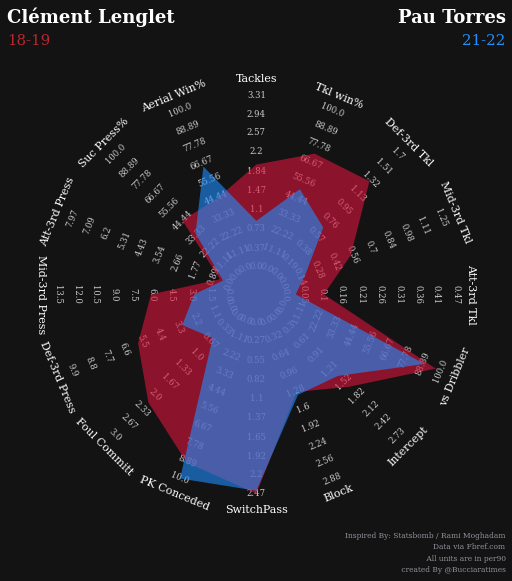

In [16]:
oneColor = '#135ED6'
theOtherColor = '#BB1D3A'
name = dfP.iloc[0,0]
name2 = dfP.iloc[1,0]

title = dict(
    title_name=name.title(),
    title_color='#ffffff',
    subtitle_name='18-19',
    subtitle_color='#B6282F',
    title_name_2=name2.title(),
    title_color_2="#ffffff",
    subtitle_name_2='21-22',
    subtitle_color_2='dodgerblue',
    title_fontsize=18,
    subtitle_fontsize=15,
)

endnote = "Data via Fbref.com\n All units are in per90\n created By @Bucciaratimes"

radar = Radar(background_color="#131313",
              patch_color="#131313", 
              label_color="#ffffff",
              range_color="#cccccc",
              label_fontsize=11,
              range_fontsize=8.5,
              fontfamily="serif")

fig, ax = radar.plot_radar(ranges=ranges, params=rename_params, values=dfP.iloc[[0,1],1:].values, title=title,
                           radar_color=["crimson","dodgerblue"],
                           endnote=endnote, 
                           end_size=7.5,
#                            image='/work/assets/image/barcelona.png',
#                            image_coord=[.477, 0.802, 0.07, 0.1],alpha=.98,
                           compare=True
                          )

# plt.savefig(f'/work/output/barcelona/{player}.png', dpi=250, bbox_inches="tight",facecolor='#131313')

In [522]:
df2 = df2[df2["Pos"]=="DF"]

In [324]:
df2 = df2.drop(columns=["Unnamed: 0"])

In [325]:
df2.reset_index(drop=True,inplace=True)

In [326]:
df2[df2["Player"].str.contains("Ronald")].columns.unique()

Index(['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Tkl_Tackles',
       'TklW_Tackles', 'Def 3rd_Tackles',
       ...
       'G+A_Per 90 Minutes', 'G-PK_Per 90 Minutes', 'G+A-PK_Per 90 Minutes',
       'xA_Expected', 'npxG+xA_Expected', 'xG_Per 90 Minutes',
       'xA_Per 90 Minutes', 'xG+xA_Per 90 Minutes', 'npxG_Per 90 Minutes',
       'npxG+xA_Per 90 Minutes'],
      dtype='object', length=168)

In [330]:
# df2["Sw_Pass Types"] = df2.loc[:,["Sw_Pass Types"]].apply(lambda x: x/df2["90s"])

df2[df2["90s"]>0].sort_values(by="Sw_Pass Types",ascending=False)[["90s","Player",'Sw_Pass Types',"Cmp%_Total", 'Cmp%_Short', 'Cmp%_Medium','Cmp%_Long']].reset_index().tail(30)


,index,90s,Player,Sw_Pass Types,Cmp%_Total,Cmp%_Short,Cmp%_Medium,Cmp%_Long
121,55,1.7,Enric Franquesa,0.588235,78.1,95.8,77.4,25.0
122,45,6.8,Domingos Duarte,0.588235,75.5,83.3,87.2,59.7
123,106,6.9,Nacho,0.579710,93.2,95.4,93.8,90.6
124,86,8.0,Hugo Mallo,0.500000,75.2,89.3,80.6,36.3
125,103,8.3,Aihen Muñoz,0.481928,78.5,91.5,83.8,45.6
126,15,2.2,Santiago Arias,0.454545,73.0,81.6,74.1,53.3
127,102,4.6,Álex Moreno,0.434783,76.3,85.7,80.2,56.3
128,5,7.0,David Alaba,0.428571,89.7,95.3,94.0,64.7
129,42,2.7,Víctor Díaz,0.370370,83.3,97.1,95.7,58.6
130,109,8.3,Carlos Neva,0.361446,70.3,82.5,77.3,44.4


,Player,Nation,Pos,Squad,Age,Born,90s,Tkl_Tackles,TklW_Tackles,Def 3rd_Tackles,...,G+A_Per 90 Minutes,G-PK_Per 90 Minutes,G+A-PK_Per 90 Minutes,xA_Expected,npxG+xA_Expected,xG_Per 90 Minutes,xA_Per 90 Minutes,xG+xA_Per 90 Minutes,npxG_Per 90 Minutes,npxG+xA_Per 90 Minutes
13,Francisco Garcia,es ESP,DF,Rayo Vallecano,22-070,1999,9.0,1.777778,0.777778,12,...,0.0,0.0,0.0,0.2,0.4,0.02,0.02,0.04,0.02,0.04


In [297]:
df2[df2["90s"]>0].sort_values(by="Cmp%_Total",ascending=False)[["90s","Player","Cmp%_Total", 'Cmp%_Short', 'Cmp%_Medium','Cmp%_Long']].head(15)


,90s,Player,Cmp%_Total,Cmp%_Short,Cmp%_Medium,Cmp%_Long
134,0.1,Sergio Santos,100.0,100.0,100.0,100.0
111,0.1,Allan Nyom,100.0,100.0,100.0,NaN
114,0.1,Jon Pacheco,100.0,100.0,100.0,100.0
13,4.9,Ronald Araújo,95.2,100.0,97.6,73.9
58,4.9,Eric García,94.9,98.0,95.2,91.1
87,6.0,Aïssa Mandi,94.6,93.3,98.6,86.8
106,6.9,Nacho,93.2,95.4,93.8,90.6
18,0.5,Alejandro Balde,92.9,100.0,95.0,50.0
64,6.9,Édgar González,92.9,97.1,95.6,80.6
75,6.0,Jules Koundé,92.9,95.4,97.5,78.1


In [243]:
df2[df2["90s"]>0].sort_values(by="Cmp%_Short",ascending=False)[["90s","Player","Cmp%_Total", 'Cmp%_Short', 'Cmp%_Medium','Cmp%_Long']].head(15)


,90s,Player,Cmp%_Total,Cmp%_Short,Cmp%_Medium,Cmp%_Long
3,4.9,Ronald Araújo,95.2,100.0,97.6,73.9
14,1.0,Kike Hermoso,92.2,100.0,96.3,66.7
18,6.0,José María Giménez,92.7,97.8,97.4,82.6
34,8.8,Martin Valjent,89.6,95.5,96.6,74.2
19,8.0,Éder Militão,91.2,95.3,92.8,84.8
6,7.0,Diego Carlos,91.2,95.0,96.6,76.7
13,9.0,Francisco Garcia,79.1,94.5,82.4,48.8
0,6.0,Marcos Acuña,81.0,93.5,86.8,59.0
23,5.8,Jeison Murillo,88.8,93.1,94.6,79.2
31,5.9,Germán Sánchez,77.7,92.9,89.7,52.0


In [242]:
df2[df2["90s"]>0].sort_values(by="Cmp%_Medium",ascending=False)[["90s","Player","Cmp%_Total", 'Cmp%_Short', 'Cmp%_Medium','Cmp%_Long']].head(15)


,90s,Player,Cmp%_Total,Cmp%_Short,Cmp%_Medium,Cmp%_Long
29,6.6,Enzo Roco,89.9,92.1,98.2,73.1
3,4.9,Ronald Araújo,95.2,100.0,97.6,73.9
18,6.0,José María Giménez,92.7,97.8,97.4,82.6
34,8.8,Martin Valjent,89.6,95.5,96.6,74.2
6,7.0,Diego Carlos,91.2,95.0,96.6,76.7
14,1.0,Kike Hermoso,92.2,100.0,96.3,66.7
23,5.8,Jeison Murillo,88.8,93.1,94.6,79.2
19,8.0,Éder Militão,91.2,95.3,92.8,84.8
5,9.0,Leandro Cabrera,77.8,87.7,91.3,58.2
36,7.0,Daniel Vivian,86.1,87.9,91.2,74.1


In [241]:
df2[df2["90s"]>0].sort_values(by="Cmp%_Long",ascending=False)[["90s","Pos","Player","Cmp%_Total", 'Cmp%_Short', 'Cmp%_Medium','Cmp%_Long']].head(15)


,90s,Pos,Player,Cmp%_Total,Cmp%_Short,Cmp%_Medium,Cmp%_Long
19,8.0,DF,Éder Militão,91.2,95.3,92.8,84.8
18,6.0,DF,José María Giménez,92.7,97.8,97.4,82.6
23,5.8,DF,Jeison Murillo,88.8,93.1,94.6,79.2
6,7.0,DF,Diego Carlos,91.2,95.0,96.6,76.7
7,2.6,DF,Dani Carvajal,84.6,91.4,86.5,76.0
34,8.8,DF,Martin Valjent,89.6,95.5,96.6,74.2
36,7.0,DF,Daniel Vivian,86.1,87.9,91.2,74.1
3,4.9,DF,Ronald Araújo,95.2,100.0,97.6,73.9
29,6.6,DF,Enzo Roco,89.9,92.1,98.2,73.1
11,3.5,DF,Pervis Estupiñán,82.3,91.0,84.7,66.7
